In [139]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1):
    plt.figure(figsize=(10,6))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_g_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3 = [],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(221)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(222)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e-10)
            print 'no results found for model ', model
    
    
    plt.subplot(223)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(221)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(222)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(223)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(224)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':',color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':',color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':',color='goldenrod', label='Inner')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_g_0_XCO_stripped.hdf5 -1185537.66575 -3774.15242579
log-like, TS: mod_g_1_XCO_stripped.hdf5 -1185574.20209 -3701.07975419
log-like, TS: mod_g_2_XCO_stripped.hdf5 -1185598.11371 -3653.25649547
log-like, TS: mod_g_3_XCO_stripped.hdf5 -1185606.67997 -3636.12397964
log-like, TS: mod_g_4_XCO_stripped.hdf5 -1185598.21041 -3653.06310382
log-like, TS: mod_g_5_XCO_stripped.hdf5 -1185587.8136 -3673.85672141
log-like, TS: mod_g_6_XCO_stripped.hdf5 -1185566.01058 -3717.46276145
log-like, TS: mod_g_7_XCO_stripped.hdf5 -1185525.47065 -3798.54262249


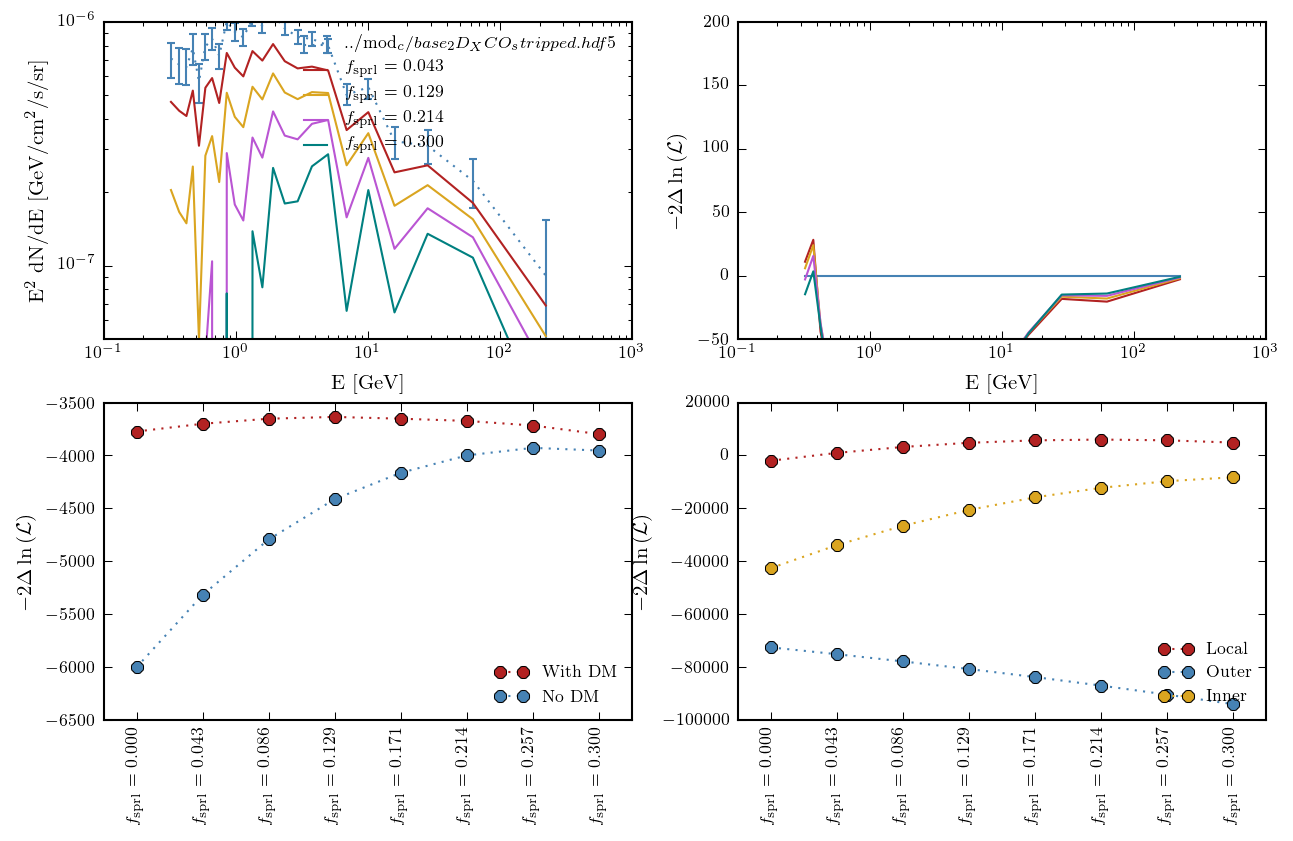

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_g_8_XCO_stripped.hdf5 -1187511.87239 174.260863531
log-like, TS: mod_g_9_XCO_stripped.hdf5 -1187622.37859 395.273252419
log-like, TS: mod_g_10_XCO_stripped.hdf5 -1187646.38566 443.287396596
log-like, TS: mod_g_11_XCO_stripped.hdf5 -1187595.67312 341.862321711
log-like, TS: mod_g_12_XCO_stripped.hdf5 -1187480.79939 112.114863126
log-like, TS: mod_g_13_XCO_stripped.hdf5 -1187310.00419 -229.475541295
log-like, TS: mod_g_14_XCO_stripped.hdf5 -1187091.26933 -666.945260825
log-like, TS: mod_g_15_XCO_stripped.hdf5 -1186830.29913 -1188.88566742


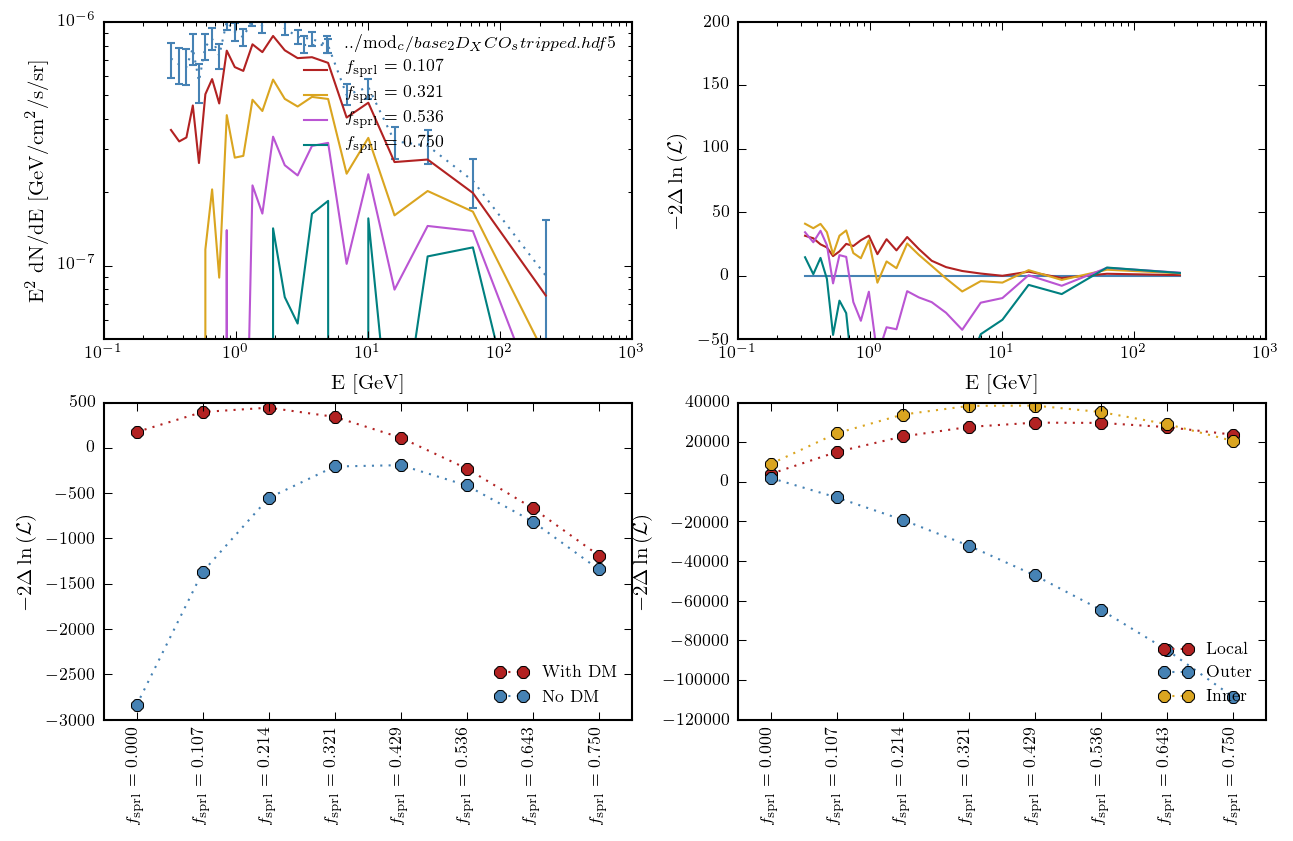

In [140]:
PlotSeries(start=0, stop=8, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2)
plt.show()
PlotSeries(start=8, stop=16, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2,)

log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
no results found for model  mod_f_21_stripped.hdf5
no results found for model  mod_f_22_stripped.hdf5
no results found for model  mod_f_23_stripped.hdf5
no results found for model  mod_f_24_stripped.hdf5


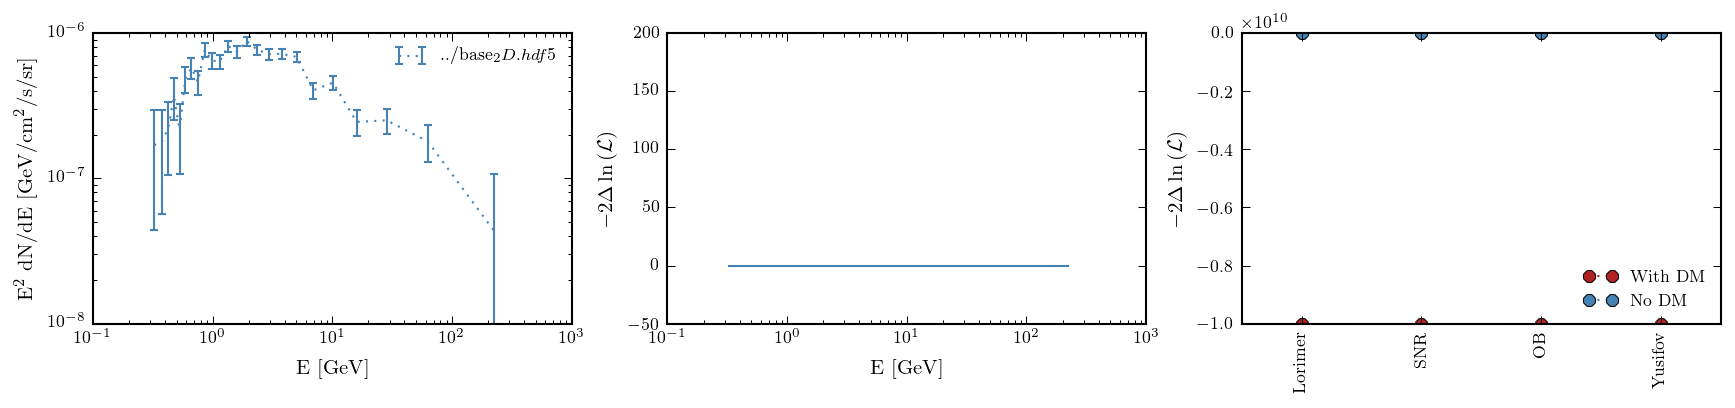

In [28]:
PlotSeries(start=21, stop=25, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
no results found for model  mod_f_25_stripped.hdf5
no results found for model  mod_f_26_stripped.hdf5
no results found for model  mod_f_27_stripped.hdf5
no results found for model  mod_f_28_stripped.hdf5


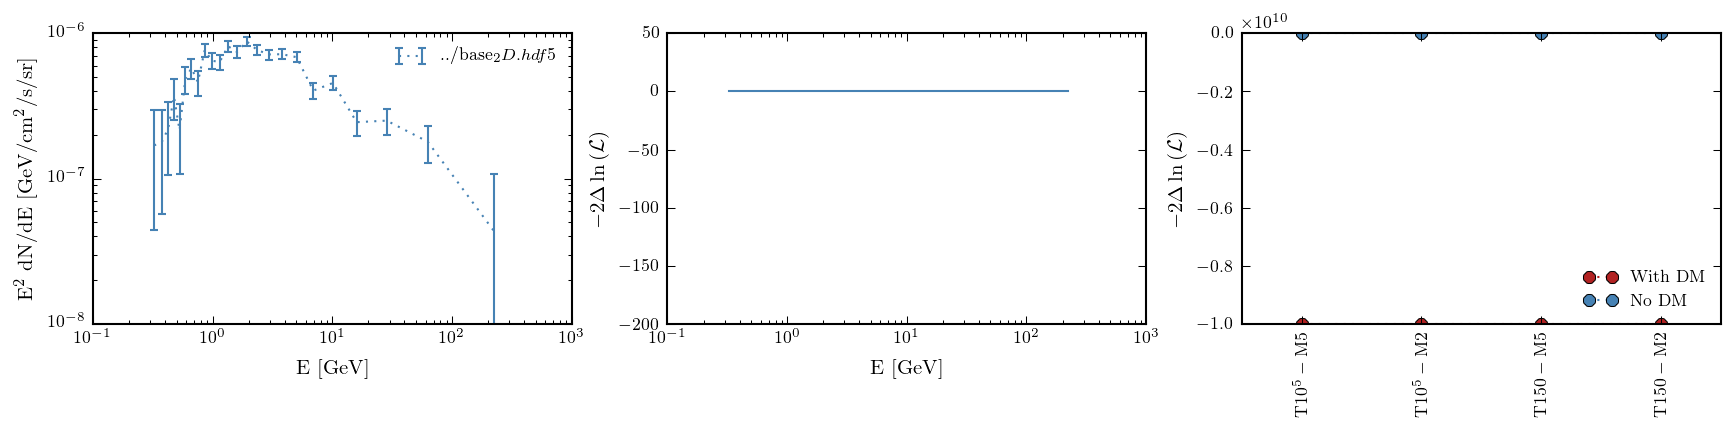

In [9]:
PlotSeries(start=25, stop=29, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
no results found for model  mod_f_29_stripped.hdf5
no results found for model  mod_f_30_stripped.hdf5
no results found for model  mod_f_31_stripped.hdf5
no results found for model  mod_f_32_stripped.hdf5
no results found for model  mod_f_33_stripped.hdf5
no results found for model  mod_f_34_stripped.hdf5
no results found for model  mod_f_35_stripped.hdf5
no results found for model  mod_f_36_stripped.hdf5


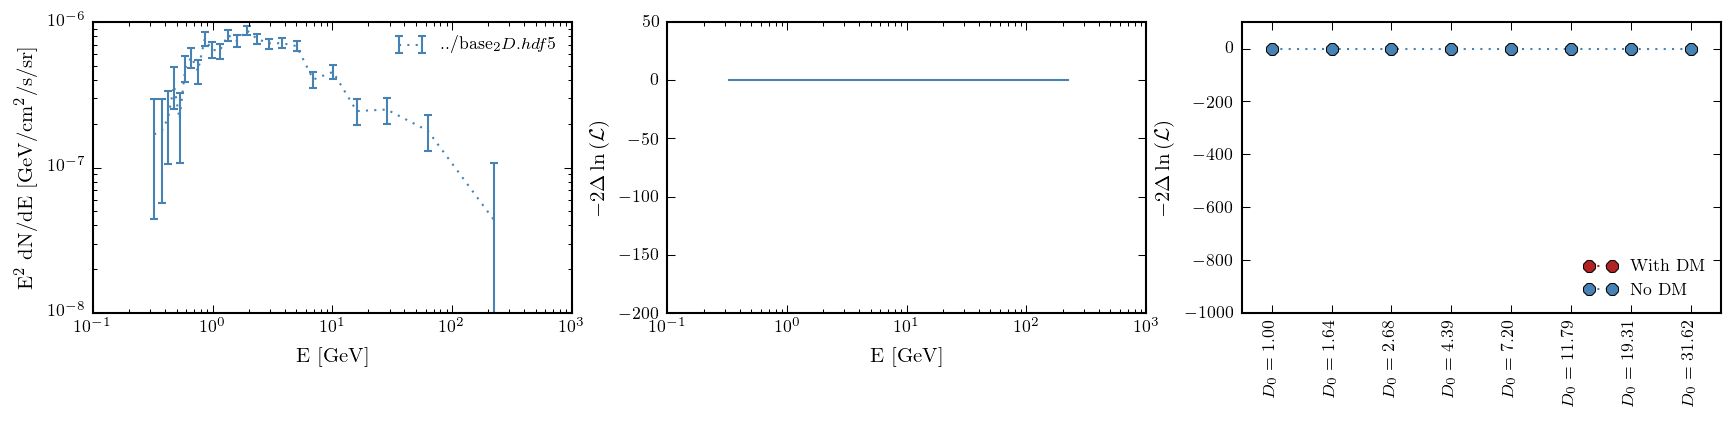

In [10]:
PlotSeries(start=29, stop=37, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28],ylim=(-1000,100))

log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
no results found for model  mod_f_37_stripped.hdf5
no results found for model  mod_f_38_stripped.hdf5
no results found for model  mod_f_39_stripped.hdf5
no results found for model  mod_f_40_stripped.hdf5
no results found for model  mod_f_41_stripped.hdf5
no results found for model  mod_f_42_stripped.hdf5
no results found for model  mod_f_43_stripped.hdf5
no results found for model  mod_f_44_stripped.hdf5


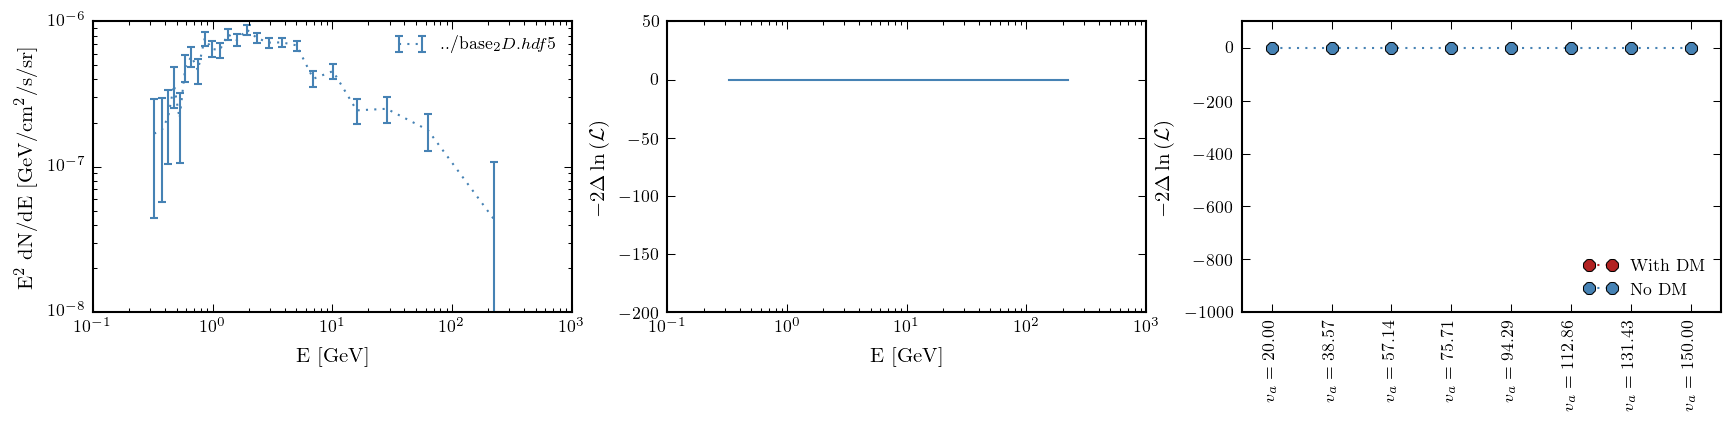

In [11]:
PlotSeries(start=37, stop=45, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-1000,100))

In [12]:
#PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
no results found for model  mod_f_45_stripped.hdf5
no results found for model  mod_f_46_stripped.hdf5
no results found for model  mod_f_47_stripped.hdf5
no results found for model  mod_f_48_stripped.hdf5
no results found for model  mod_f_49_stripped.hdf5
no results found for model  mod_f_50_stripped.hdf5
no results found for model  mod_f_51_stripped.hdf5
no results found for model  mod_f_52_stripped.hdf5
no results found for model  mod_f_53_stripped.hdf5
no results found for model  mod_f_54_stripped.hdf5
no results found for model  mod_f_55_stripped.hdf5


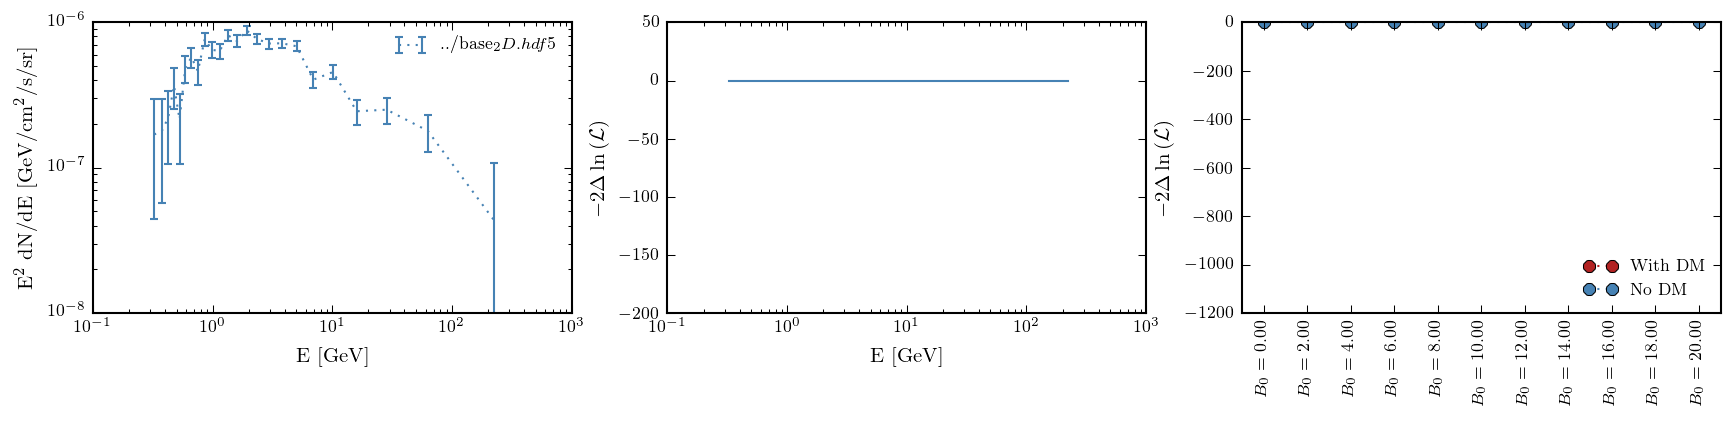

In [13]:
PlotSeries(start=45, stop=56, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.linspace(0,20,11)], ylim=(-1200,0), mod=2)

In [14]:
#PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

In [15]:
#PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

In [16]:
#PlotSeries(start=69, stop=80, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,.15,16)])

In [17]:
#PlotSeries(start=65, stop=73, text=r'\noindent ISRF OPT+FIR', labels=[r'$\rm isrf_{opt,fir}=%2.2f' % v + '$' for v in np.linspace(.5,3,8)])